# Object Detection

There are many pre-trained models for object detection models like "MobileNet-SSD v1", "MobileNet-SSD v1 PPN", "MobileNet-SSD v2", "Inception-SSD v2", **"MobileNet-SSD v3"**, "Faster-RCNN Inception v2", "Faster-RCNN ResNet-50", "Mask-RCNN Inception v2", "EfficientDet-D0"

In this, notebook I have used the model which is highlighted above.

You can also use other pre-trained models which are mentioned in the ***README*** file.

In [1]:
# Download model weights and config

!wget -O "ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz" "http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz"
!wget -O "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt" "https://gist.githubusercontent.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/raw/2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
!wget -O "labels.txt" "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2021-05-13 14:44:59--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.183.240
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.183.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49318766 (47M) [application/gzip]
Saving to: ‘ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’

ssd_mobilenet_v3_la 100%[===================>]  47.03M   749KB/s    in 2m 12s  

2021-05-13 14:47:26 (365 KB/s) - ‘ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’ saved [49318766/49318766]

--2021-05-13 14:47:26--  https://gist.githubusercontent.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/raw/2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist

In [1]:
# Required modules

import os
import cv2
import tarfile
import numpy as np
import pandas as pd

from zipfile import ZipFile
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Extracting the weights

with tarfile.open('./ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz', 'r') as gzf:
    gzf.extractall('./')

In this, model the feature extractor is **MobileNet**

In [3]:
# File paths

frozen_model = "./ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb"
config_file = "./ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

In [4]:
# Loading the model

model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [5]:
# Model configs

model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

<dnn_Model 0x7f10c2a409b0>

In [6]:
# Making a label list

with open('./labels.txt', 'r') as fh:
    labels = list(map(str.rstrip, fh.readlines()))

print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
# Prediction on the image

img_arr = cv2.imread('./test.jpeg')
classes, confidence, bbox = model.detect(img_arr, confThreshold=0.5)

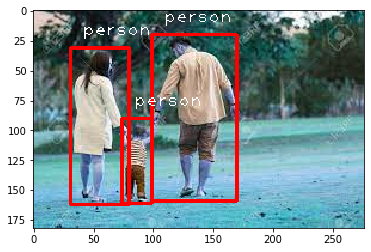

In [8]:
# Drawing Bounding boxes in the image

font_size = 1
font = cv2.FONT_HERSHEY_PLAIN

for idx, conf, box in zip(classes.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img_arr, box, (255, 0, 0), 2)
    cv2.putText(img_arr, labels[idx-1], (box[0]+10, box[1]-10), font, fontScale=font_size, color=(255, 255, 255), thickness=1)

plt.imshow(img_arr)